# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

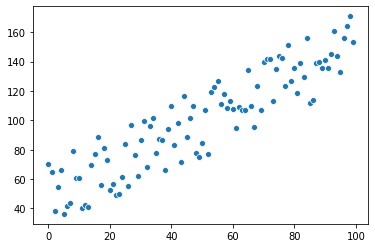

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 432.528957
Iteration 1 | Cost: 427.968929
Iteration 2 | Cost: 423.669106
Iteration 3 | Cost: 419.614390
Iteration 4 | Cost: 415.790555
Iteration 5 | Cost: 412.184204
Iteration 6 | Cost: 408.782716
Iteration 7 | Cost: 405.574203
Iteration 8 | Cost: 402.547466
Iteration 9 | Cost: 399.691957
Iteration 10 | Cost: 396.997739
Iteration 11 | Cost: 394.455454
Iteration 12 | Cost: 392.056284
Iteration 13 | Cost: 389.791926
Iteration 14 | Cost: 387.654556
Iteration 15 | Cost: 385.636805
Iteration 16 | Cost: 383.731734
Iteration 17 | Cost: 381.932803
Iteration 18 | Cost: 380.233854
Iteration 19 | Cost: 378.629085
Iteration 20 | Cost: 377.113033
Iteration 21 | Cost: 375.680548
Iteration 22 | Cost: 374.326784
Iteration 23 | Cost: 373.047172
Iteration 24 | Cost: 371.837410
Iteration 25 | Cost: 370.693445
Iteration 26 | Cost: 369.611461
Iteration 27 | Cost: 368.587862
Iteration 28 | Cost: 367.619259
Iteration 29 | Cost: 366.702464
Iteration 30 | Cost: 365.834470
Iteration 31 | Cos

Iteration 1453 | Cost: 264.879792
Iteration 1454 | Cost: 264.830332
Iteration 1455 | Cost: 264.780887
Iteration 1456 | Cost: 264.731457
Iteration 1457 | Cost: 264.682042
Iteration 1458 | Cost: 264.632642
Iteration 1459 | Cost: 264.583257
Iteration 1460 | Cost: 264.533887
Iteration 1461 | Cost: 264.484532
Iteration 1462 | Cost: 264.435192
Iteration 1463 | Cost: 264.385868
Iteration 1464 | Cost: 264.336558
Iteration 1465 | Cost: 264.287263
Iteration 1466 | Cost: 264.237983
Iteration 1467 | Cost: 264.188718
Iteration 1468 | Cost: 264.139469
Iteration 1469 | Cost: 264.090234
Iteration 1470 | Cost: 264.041014
Iteration 1471 | Cost: 263.991809
Iteration 1472 | Cost: 263.942619
Iteration 1473 | Cost: 263.893444
Iteration 1474 | Cost: 263.844284
Iteration 1475 | Cost: 263.795139
Iteration 1476 | Cost: 263.746009
Iteration 1477 | Cost: 263.696894
Iteration 1478 | Cost: 263.647794
Iteration 1479 | Cost: 263.598709
Iteration 1480 | Cost: 263.549639
Iteration 1481 | Cost: 263.500584
Iteration 1482

Iteration 2952 | Cost: 205.343986
Iteration 2953 | Cost: 205.312651
Iteration 2954 | Cost: 205.281325
Iteration 2955 | Cost: 205.250008
Iteration 2956 | Cost: 205.218701
Iteration 2957 | Cost: 205.187403
Iteration 2958 | Cost: 205.156115
Iteration 2959 | Cost: 205.124837
Iteration 2960 | Cost: 205.093568
Iteration 2961 | Cost: 205.062308
Iteration 2962 | Cost: 205.031059
Iteration 2963 | Cost: 204.999818
Iteration 2964 | Cost: 204.968587
Iteration 2965 | Cost: 204.937366
Iteration 2966 | Cost: 204.906154
Iteration 2967 | Cost: 204.874951
Iteration 2968 | Cost: 204.843759
Iteration 2969 | Cost: 204.812575
Iteration 2970 | Cost: 204.781401
Iteration 2971 | Cost: 204.750237
Iteration 2972 | Cost: 204.719082
Iteration 2973 | Cost: 204.687936
Iteration 2974 | Cost: 204.656801
Iteration 2975 | Cost: 204.625674
Iteration 2976 | Cost: 204.594557
Iteration 2977 | Cost: 204.563449
Iteration 2978 | Cost: 204.532351
Iteration 2979 | Cost: 204.501263
Iteration 2980 | Cost: 204.470184
Iteration 2981

Iteration 4452 | Cost: 167.605000
Iteration 4453 | Cost: 167.585153
Iteration 4454 | Cost: 167.565312
Iteration 4455 | Cost: 167.545477
Iteration 4456 | Cost: 167.525649
Iteration 4457 | Cost: 167.505826
Iteration 4458 | Cost: 167.486009
Iteration 4459 | Cost: 167.466199
Iteration 4460 | Cost: 167.446394
Iteration 4461 | Cost: 167.426596
Iteration 4462 | Cost: 167.406803
Iteration 4463 | Cost: 167.387017
Iteration 4464 | Cost: 167.367236
Iteration 4465 | Cost: 167.347462
Iteration 4466 | Cost: 167.327693
Iteration 4467 | Cost: 167.307931
Iteration 4468 | Cost: 167.288175
Iteration 4469 | Cost: 167.268424
Iteration 4470 | Cost: 167.248680
Iteration 4471 | Cost: 167.228942
Iteration 4472 | Cost: 167.209209
Iteration 4473 | Cost: 167.189483
Iteration 4474 | Cost: 167.169763
Iteration 4475 | Cost: 167.150049
Iteration 4476 | Cost: 167.130340
Iteration 4477 | Cost: 167.110638
Iteration 4478 | Cost: 167.090942
Iteration 4479 | Cost: 167.071251
Iteration 4480 | Cost: 167.051567
Iteration 4481

Iteration 5951 | Cost: 143.715175
Iteration 5952 | Cost: 143.702601
Iteration 5953 | Cost: 143.690031
Iteration 5954 | Cost: 143.677464
Iteration 5955 | Cost: 143.664902
Iteration 5956 | Cost: 143.652343
Iteration 5957 | Cost: 143.639788
Iteration 5958 | Cost: 143.627237
Iteration 5959 | Cost: 143.614690
Iteration 5960 | Cost: 143.602147
Iteration 5961 | Cost: 143.589607
Iteration 5962 | Cost: 143.577071
Iteration 5963 | Cost: 143.564539
Iteration 5964 | Cost: 143.552011
Iteration 5965 | Cost: 143.539487
Iteration 5966 | Cost: 143.526966
Iteration 5967 | Cost: 143.514449
Iteration 5968 | Cost: 143.501937
Iteration 5969 | Cost: 143.489427
Iteration 5970 | Cost: 143.476922
Iteration 5971 | Cost: 143.464421
Iteration 5972 | Cost: 143.451923
Iteration 5973 | Cost: 143.439429
Iteration 5974 | Cost: 143.426939
Iteration 5975 | Cost: 143.414453
Iteration 5976 | Cost: 143.401970
Iteration 5977 | Cost: 143.389492
Iteration 5978 | Cost: 143.377017
Iteration 5979 | Cost: 143.364546
Iteration 5980

Iteration 7451 | Cost: 128.571720
Iteration 7452 | Cost: 128.563756
Iteration 7453 | Cost: 128.555795
Iteration 7454 | Cost: 128.547836
Iteration 7455 | Cost: 128.539879
Iteration 7456 | Cost: 128.531925
Iteration 7457 | Cost: 128.523973
Iteration 7458 | Cost: 128.516024
Iteration 7459 | Cost: 128.508077
Iteration 7460 | Cost: 128.500133
Iteration 7461 | Cost: 128.492191
Iteration 7462 | Cost: 128.484251
Iteration 7463 | Cost: 128.476314
Iteration 7464 | Cost: 128.468379
Iteration 7465 | Cost: 128.460446
Iteration 7466 | Cost: 128.452516
Iteration 7467 | Cost: 128.444589
Iteration 7468 | Cost: 128.436663
Iteration 7469 | Cost: 128.428741
Iteration 7470 | Cost: 128.420820
Iteration 7471 | Cost: 128.412902
Iteration 7472 | Cost: 128.404987
Iteration 7473 | Cost: 128.397074
Iteration 7474 | Cost: 128.389163
Iteration 7475 | Cost: 128.381255
Iteration 7476 | Cost: 128.373349
Iteration 7477 | Cost: 128.365445
Iteration 7478 | Cost: 128.357544
Iteration 7479 | Cost: 128.349646
Iteration 7480

Iteration 8853 | Cost: 119.482287
Iteration 8854 | Cost: 119.477090
Iteration 8855 | Cost: 119.471895
Iteration 8856 | Cost: 119.466701
Iteration 8857 | Cost: 119.461509
Iteration 8858 | Cost: 119.456319
Iteration 8859 | Cost: 119.451130
Iteration 8860 | Cost: 119.445943
Iteration 8861 | Cost: 119.440757
Iteration 8862 | Cost: 119.435573
Iteration 8863 | Cost: 119.430390
Iteration 8864 | Cost: 119.425209
Iteration 8865 | Cost: 119.420030
Iteration 8866 | Cost: 119.414852
Iteration 8867 | Cost: 119.409676
Iteration 8868 | Cost: 119.404501
Iteration 8869 | Cost: 119.399328
Iteration 8870 | Cost: 119.394157
Iteration 8871 | Cost: 119.388987
Iteration 8872 | Cost: 119.383818
Iteration 8873 | Cost: 119.378651
Iteration 8874 | Cost: 119.373486
Iteration 8875 | Cost: 119.368322
Iteration 8876 | Cost: 119.363160
Iteration 8877 | Cost: 119.358000
Iteration 8878 | Cost: 119.352841
Iteration 8879 | Cost: 119.347683
Iteration 8880 | Cost: 119.342528
Iteration 8881 | Cost: 119.337373
Iteration 8882

Iteration 10025 | Cost: 114.359072
Iteration 10026 | Cost: 114.355435
Iteration 10027 | Cost: 114.351799
Iteration 10028 | Cost: 114.348164
Iteration 10029 | Cost: 114.344530
Iteration 10030 | Cost: 114.340898
Iteration 10031 | Cost: 114.337266
Iteration 10032 | Cost: 114.333636
Iteration 10033 | Cost: 114.330006
Iteration 10034 | Cost: 114.326378
Iteration 10035 | Cost: 114.322751
Iteration 10036 | Cost: 114.319125
Iteration 10037 | Cost: 114.315500
Iteration 10038 | Cost: 114.311876
Iteration 10039 | Cost: 114.308253
Iteration 10040 | Cost: 114.304631
Iteration 10041 | Cost: 114.301011
Iteration 10042 | Cost: 114.297391
Iteration 10043 | Cost: 114.293773
Iteration 10044 | Cost: 114.290156
Iteration 10045 | Cost: 114.286540
Iteration 10046 | Cost: 114.282925
Iteration 10047 | Cost: 114.279311
Iteration 10048 | Cost: 114.275698
Iteration 10049 | Cost: 114.272086
Iteration 10050 | Cost: 114.268475
Iteration 10051 | Cost: 114.264866
Iteration 10052 | Cost: 114.261257
Iteration 10053 | Co

Iteration 11237 | Cost: 110.672217
Iteration 11238 | Cost: 110.669703
Iteration 11239 | Cost: 110.667189
Iteration 11240 | Cost: 110.664675
Iteration 11241 | Cost: 110.662163
Iteration 11242 | Cost: 110.659651
Iteration 11243 | Cost: 110.657140
Iteration 11244 | Cost: 110.654630
Iteration 11245 | Cost: 110.652121
Iteration 11246 | Cost: 110.649612
Iteration 11247 | Cost: 110.647104
Iteration 11248 | Cost: 110.644597
Iteration 11249 | Cost: 110.642091
Iteration 11250 | Cost: 110.639585
Iteration 11251 | Cost: 110.637081
Iteration 11252 | Cost: 110.634576
Iteration 11253 | Cost: 110.632073
Iteration 11254 | Cost: 110.629571
Iteration 11255 | Cost: 110.627069
Iteration 11256 | Cost: 110.624568
Iteration 11257 | Cost: 110.622068
Iteration 11258 | Cost: 110.619568
Iteration 11259 | Cost: 110.617070
Iteration 11260 | Cost: 110.614572
Iteration 11261 | Cost: 110.612074
Iteration 11262 | Cost: 110.609578
Iteration 11263 | Cost: 110.607082
Iteration 11264 | Cost: 110.604587
Iteration 11265 | Co

Iteration 12683 | Cost: 107.730335
Iteration 12684 | Cost: 107.728716
Iteration 12685 | Cost: 107.727097
Iteration 12686 | Cost: 107.725479
Iteration 12687 | Cost: 107.723862
Iteration 12688 | Cost: 107.722244
Iteration 12689 | Cost: 107.720628
Iteration 12690 | Cost: 107.719011
Iteration 12691 | Cost: 107.717396
Iteration 12692 | Cost: 107.715781
Iteration 12693 | Cost: 107.714166
Iteration 12694 | Cost: 107.712552
Iteration 12695 | Cost: 107.710938
Iteration 12696 | Cost: 107.709325
Iteration 12697 | Cost: 107.707712
Iteration 12698 | Cost: 107.706100
Iteration 12699 | Cost: 107.704488
Iteration 12700 | Cost: 107.702877
Iteration 12701 | Cost: 107.701266
Iteration 12702 | Cost: 107.699656
Iteration 12703 | Cost: 107.698046
Iteration 12704 | Cost: 107.696436
Iteration 12705 | Cost: 107.694828
Iteration 12706 | Cost: 107.693219
Iteration 12707 | Cost: 107.691611
Iteration 12708 | Cost: 107.690004
Iteration 12709 | Cost: 107.688397
Iteration 12710 | Cost: 107.686791
Iteration 12711 | Co

Iteration 13891 | Cost: 106.093539
Iteration 13892 | Cost: 106.092418
Iteration 13893 | Cost: 106.091297
Iteration 13894 | Cost: 106.090177
Iteration 13895 | Cost: 106.089057
Iteration 13896 | Cost: 106.087938
Iteration 13897 | Cost: 106.086819
Iteration 13898 | Cost: 106.085700
Iteration 13899 | Cost: 106.084582
Iteration 13900 | Cost: 106.083463
Iteration 13901 | Cost: 106.082346
Iteration 13902 | Cost: 106.081228
Iteration 13903 | Cost: 106.080111
Iteration 13904 | Cost: 106.078994
Iteration 13905 | Cost: 106.077878
Iteration 13906 | Cost: 106.076762
Iteration 13907 | Cost: 106.075646
Iteration 13908 | Cost: 106.074531
Iteration 13909 | Cost: 106.073416
Iteration 13910 | Cost: 106.072301
Iteration 13911 | Cost: 106.071186
Iteration 13912 | Cost: 106.070072
Iteration 13913 | Cost: 106.068959
Iteration 13914 | Cost: 106.067845
Iteration 13915 | Cost: 106.066732
Iteration 13916 | Cost: 106.065620
Iteration 13917 | Cost: 106.064507
Iteration 13918 | Cost: 106.063395
Iteration 13919 | Co

Iteration 15403 | Cost: 104.735143
Iteration 15404 | Cost: 104.734435
Iteration 15405 | Cost: 104.733728
Iteration 15406 | Cost: 104.733021
Iteration 15407 | Cost: 104.732315
Iteration 15408 | Cost: 104.731608
Iteration 15409 | Cost: 104.730902
Iteration 15410 | Cost: 104.730196
Iteration 15411 | Cost: 104.729490
Iteration 15412 | Cost: 104.728785
Iteration 15413 | Cost: 104.728079
Iteration 15414 | Cost: 104.727374
Iteration 15415 | Cost: 104.726669
Iteration 15416 | Cost: 104.725964
Iteration 15417 | Cost: 104.725260
Iteration 15418 | Cost: 104.724556
Iteration 15419 | Cost: 104.723851
Iteration 15420 | Cost: 104.723148
Iteration 15421 | Cost: 104.722444
Iteration 15422 | Cost: 104.721740
Iteration 15423 | Cost: 104.721037
Iteration 15424 | Cost: 104.720334
Iteration 15425 | Cost: 104.719631
Iteration 15426 | Cost: 104.718929
Iteration 15427 | Cost: 104.718226
Iteration 15428 | Cost: 104.717524
Iteration 15429 | Cost: 104.716822
Iteration 15430 | Cost: 104.716121
Iteration 15431 | Co

Iteration 16447 | Cost: 104.102468
Iteration 16448 | Cost: 104.101953
Iteration 16449 | Cost: 104.101439
Iteration 16450 | Cost: 104.100924
Iteration 16451 | Cost: 104.100410
Iteration 16452 | Cost: 104.099896
Iteration 16453 | Cost: 104.099382
Iteration 16454 | Cost: 104.098868
Iteration 16455 | Cost: 104.098355
Iteration 16456 | Cost: 104.097841
Iteration 16457 | Cost: 104.097328
Iteration 16458 | Cost: 104.096815
Iteration 16459 | Cost: 104.096302
Iteration 16460 | Cost: 104.095789
Iteration 16461 | Cost: 104.095276
Iteration 16462 | Cost: 104.094764
Iteration 16463 | Cost: 104.094251
Iteration 16464 | Cost: 104.093739
Iteration 16465 | Cost: 104.093227
Iteration 16466 | Cost: 104.092715
Iteration 16467 | Cost: 104.092203
Iteration 16468 | Cost: 104.091692
Iteration 16469 | Cost: 104.091180
Iteration 16470 | Cost: 104.090669
Iteration 16471 | Cost: 104.090158
Iteration 16472 | Cost: 104.089647
Iteration 16473 | Cost: 104.089136
Iteration 16474 | Cost: 104.088626
Iteration 16475 | Co

Iteration 17947 | Cost: 103.482581
Iteration 17948 | Cost: 103.482255
Iteration 17949 | Cost: 103.481929
Iteration 17950 | Cost: 103.481603
Iteration 17951 | Cost: 103.481277
Iteration 17952 | Cost: 103.480952
Iteration 17953 | Cost: 103.480626
Iteration 17954 | Cost: 103.480301
Iteration 17955 | Cost: 103.479976
Iteration 17956 | Cost: 103.479650
Iteration 17957 | Cost: 103.479325
Iteration 17958 | Cost: 103.479000
Iteration 17959 | Cost: 103.478675
Iteration 17960 | Cost: 103.478351
Iteration 17961 | Cost: 103.478026
Iteration 17962 | Cost: 103.477701
Iteration 17963 | Cost: 103.477377
Iteration 17964 | Cost: 103.477052
Iteration 17965 | Cost: 103.476728
Iteration 17966 | Cost: 103.476404
Iteration 17967 | Cost: 103.476080
Iteration 17968 | Cost: 103.475756
Iteration 17969 | Cost: 103.475432
Iteration 17970 | Cost: 103.475108
Iteration 17971 | Cost: 103.474784
Iteration 17972 | Cost: 103.474461
Iteration 17973 | Cost: 103.474137
Iteration 17974 | Cost: 103.473814
Iteration 17975 | Co

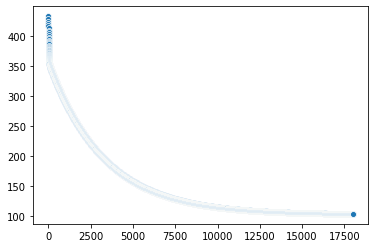

In [6]:
numEpochs= 18000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise